# Introduction to Machine Learning
* **Final Project. Nov, 2017**
* **Student: Guillermo Naranjo**

In [1]:
import sys
import pandas as pd
import numpy as np
import pickle
sys.path.append("../tools/")
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def computeFraction(salary, bonus):
    """ Computing how much EXTRA salaries you will receive in bonus """    
    invalid_data = salary == 'NaN' or bonus == 'NaN'
    fraction = 0. if invalid_data else float(bonus) / float(salary)
    return fraction

def add_bonus_by_salary(data_dict):
    """ I'm creating a new feature merging mixing salary and bonus"""
    submit_dict = {}
    for name in data_dict:
        data_point = data_dict[name]
        
        salary = data_point["salary"]
        bonus = data_point["bonus"]
        bonus_fraction = computeFraction(salary,bonus)        

        data_point["bonus_extra_salary"] = bonus_fraction

In [3]:
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)        

In [4]:
df = pd.DataFrame(data_dict).transpose().reset_index().replace('NaN', np.nan).fillna(0)

In [5]:
df = df.drop(['index','email_address'],1).apply(pd.to_numeric)

In [6]:
df = df.drop([130])

### How well distribuited are features and NaN data against POI?

In [7]:
pois = np.array(df[df['poi']].index)
wo_nan_poi = np.array([])
w_nan_poi = np.array([])
for col in df.columns:     
    b = np.array([len(np.intersect1d(pois,np.array(df[df[col] != 0].index)))])    
    c = np.array([len(np.intersect1d(pois,np.array(df[df[col] == 0].index)))])    
    wo_nan_poi = np.concatenate((wo_nan_poi,b))
    w_nan_poi = np.concatenate((w_nan_poi,c))

In [8]:
poi_summary = pd.DataFrame(columns=list(['feature','total','wo_nan','w_nan','poi','wo_nan_poi','w_nan_poi']))
poi_summary['feature'] = df.columns
poi_summary['total'] = [146]*20
poi_summary['poi'] = [18]*20
poi_summary['wo_nan'] = np.array(df.applymap(lambda x: x != 0).sum())
poi_summary['w_nan'] = np.array(df.applymap(lambda x: x == 0).sum())
poi_summary['wo_nan_poi'] = wo_nan_poi.astype(int)
poi_summary['w_nan_poi'] = w_nan_poi.astype(int)
poi_summary

,feature,total,wo_nan,w_nan,poi,wo_nan_poi,w_nan_poi
0,bonus,146,81,64,18,16,2
1,deferral_payments,146,38,107,18,5,13
2,deferred_income,146,48,97,18,11,7
3,director_fees,146,16,129,18,0,18
4,exercised_stock_options,146,101,44,18,12,6
5,expenses,146,94,51,18,18,0
6,from_messages,146,86,59,18,14,4
7,from_poi_to_this_person,146,74,71,18,14,4
8,from_this_person_to_poi,146,66,79,18,14,4
9,loan_advances,146,3,142,18,1,17


**Observations about NaN:**
* **bonus: even when there are 64 people with NaN there are POIs both related to NaN and NonNA Bonu. (INCLUDE).**
* deferral_payments: problem is there are a bunch of NaN in this feature. fairly good (ANALYZE FEATURE REDUCTION).
* deferred_income: same as deferral_payments. fairly good (ANALYZE FEATURE REDUCTION)
* director_fees: same as deferral_payments. not good because all POI has NaN director fees. bad. (REMOVE)
* **exercised_stock_options: little NaN and balances POIs. (INCLUDE).**
* expenses: have some NaN but all POI are not NaN expenses so could be a problem. (EXCLUDE).
* from_messages: balances but with half NaN. (ANALYZE FEATURE REDUCTION).
* from_poi_to_this_person: same as from_messages (ANALYZE FEATURE REDUCTION).
* from_this_person_to_poi: same as from_messages (ANALYZE FEATURE REDUCTION).
* loan_advances: most of them are NaN. (REMOVE).
* long_term_incentive: more than half are NaN but POIs are balanced. (ANALYZE FEATURE REDUCTION).
* other" less than half NaN but POIs are not balanced. (REMOVE).
* **restricted_stock: less than half NaN but POI not that balanced.(INCLUDE).**
* restricted_stock_deferred: same as director_fees (REMOVE).
* **salary: less than half NaN but POI not that balanced.(INCLUDE).
* **shared_receipt_with_poi: lookls good. Few NaN and balances POIs.(INCLUDE)**
* to_messages: sames as shared_receipt_with_poi. Can the be reduced to one feature? (ANALYZE FEATURE REDUCTION)
* total_payments: few NaN but POIs are not balanced at all. (REMOVE).
* total_stock_value: same as total_payments (REMOVE).

### Now, lets see relations excluding less interesting features.

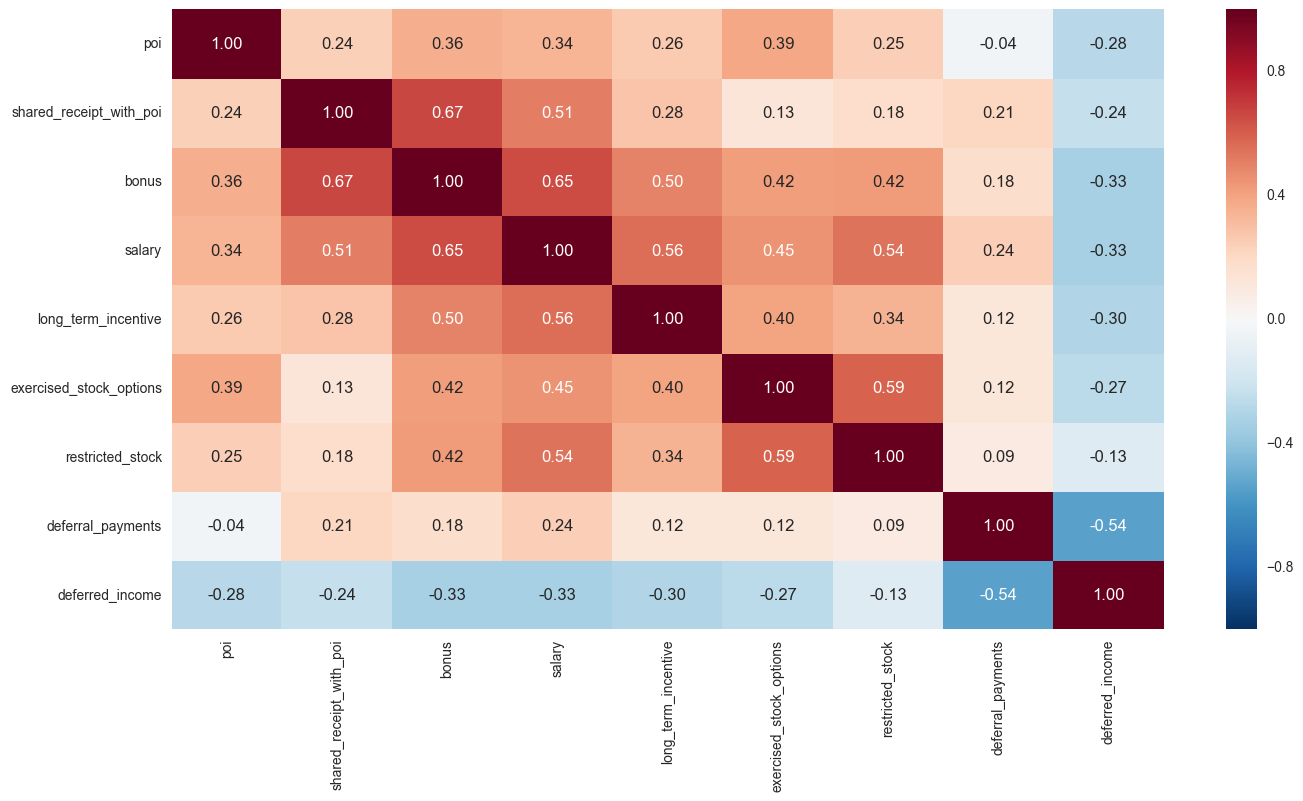

In [9]:
import seaborn
from matplotlib.colors import ListedColormap
from matplotlib.pylab import *

corr = df[['poi','shared_receipt_with_poi','bonus','salary','long_term_incentive',
           'exercised_stock_options','restricted_stock','deferral_payments',
           'deferred_income']].corr('pearson')

fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(corr, annot=True, fmt=".2f")
sns.set(font_scale = 1)
plt.show()

**Observations**
* There is a relation between deferral_payments,deferred_income. (USE)
* There is a relation between bonus, salary, log_term_incentive (COMPARE).
* There is a relation between bonus and and shared_receipt_with_poi (USE BOTH).
* There is a relation between exercise_stock_options and restricted_stock (USE only exercise_stock_options)

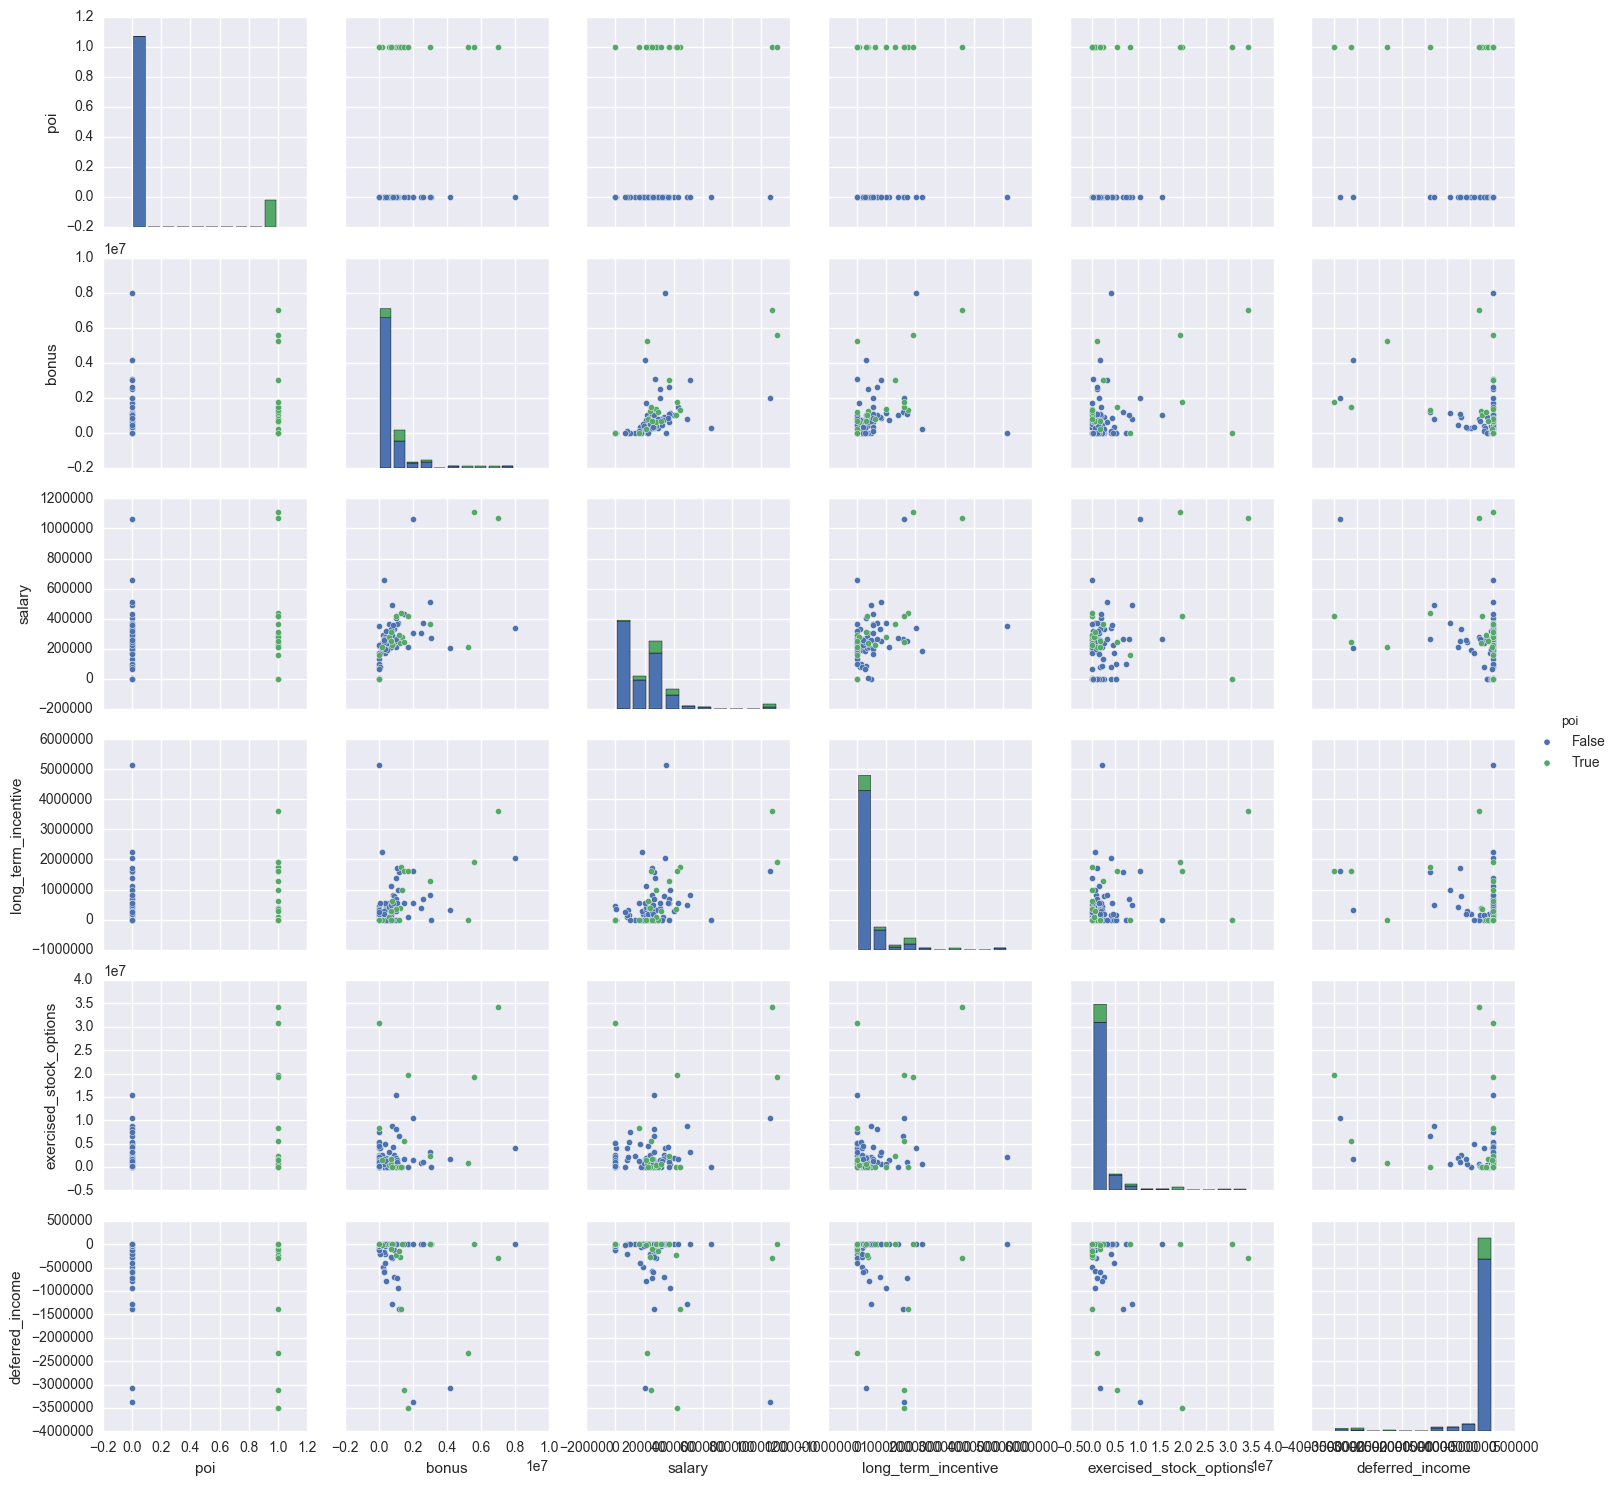

In [10]:
'''Comparing key attributes'''
sns.pairplot(df[['poi','bonus','salary','long_term_incentive','exercised_stock_options','deferred_income']],hue="poi")
plt.show()

**Observations**
* The relation between salary and bonus is interesting for both POI and not POI. I will mix both in a new metric.
* Long Term Incentive is not that close related, I'll keep it separate. 
* Also, salary, bonuses and long_term_incentive show up to three possible outliers but once verified they are valid and possible POIs, so, I'll keep them in.

In [11]:
add_bonus_by_salary(data_dict)
df2 = pd.DataFrame(data_dict).transpose().reset_index().replace('NaN', np.nan).fillna(0)
df2 = df2.drop(['index','email_address'],1).apply(pd.to_numeric)
df2 = df2.drop([130])

In [12]:
df2[['bonus_extra_salary','salary','bonus']].head()

,bonus_extra_salary,salary,bonus
0,20.672922,201955.0,4175000.0
1,0.000000,0.0,0.0
2,0.000000,477.0,0.0
3,4.492666,267102.0,1200000.0
4,1.668955,239671.0,400000.0


In [13]:
df2[['poi','bonus_extra_salary']].corr('pearson')

,poi,bonus_extra_salary
poi,1.000000,0.268699
bonus_extra_salary,0.268699,1.000000


### FEATURE SELECTION PLAN
Train and test with (in order):
* exercised_stock_options, bonus_extra_salary, bonus, salary, long_term_incentive, shared_receipt_with_poi and deferred_income